In [371]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.cm as cm

n = 5
matrix = []
block_unblock_matrix = []

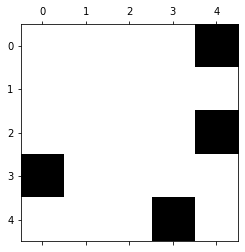

In [372]:
def populateMatrix(n,p):
    np_array = np.random.rand(n*n)
    block = lambda x: 0 if x>=p else 1
    vectorized_block = np.vectorize(block)
    np_array = vectorized_block(np_array).reshape(n,n)
    np_array[0,0]=0
    np_array[n-1,n-1] =0
    return np_array
    
np_array = populateMatrix(5,0.3)
block_unblock_matrix = np.asmatrix(np_array)

plt.spy(block_unblock_matrix)

In [476]:
gOfN = {(0,0):0}
parentTable = {}
fringe = {(0,0):0}   #{(x,y): cost}
visited = []         #change datatype if necessary
hOfN ={}
fOfN ={}
parent = (0,0)       #global parent variable
source = (0,0)
goal= (n-1,n-1)

""" ignore this block
def indexToCoordinates(c):
    if c==0:
        return (0,0)
    x=int(c/n)
    y=c%n
    return (x,y)
    
def coordinatesToIndex(x,y):
    return n*x+y
"""
    
# indexToCoordinates(8)
# print(coordinatesToIndex(1,1))+3

' ignore this block\ndef indexToCoordinates(c):\n    if c==0:\n        return (0,0)\n    x=int(c/n)\n    y=c%n\n    return (x,y)\n    \ndef coordinatesToIndex(x,y):\n    return n*x+y\n'

In [477]:
def computeHOfN(node, heuristic):
    currentX = node[0]
    currentY = node[1]
    goalX = goal[0]
    goalY = goal[1]
    if heuristic == "euclidean":
        return math.sqrt(((goalX -currentX)**2 + (goalY - currentY)**2))
    if heuristic == "manhattan":
        return abs(goalX -currentX) + abs(goalY - currentY)
    if heuristc == "chebyshev":
        return max((goalX - currentX), (goalY - currentY))

In [478]:
def computeFOfN(node):
    if node not in gOfN.keys():
        print ("ERROR Cost Table has no node: ",node)
        return
    return hOfN[node] + gOfN[node]

In [479]:
def generateValidChildren(node):
    x = node[0]
    y = node[1]
    global visited
    allChildren = [(x+1,y),(x-1,y),(x,y+1),(x,y-1)]
    if x+1>n-1:
        allChildren.remove((x+1,y))
    if x-1 < 0:
        allChildren.remove((x-1,y))
    if y+1 > n-1:
        allChildren.remove((x,y+1))
    if y-1 < 0:
        allChildren.remove((x,y-1))
    print("children of ",node," so far: ",allChildren)
    
    allChildren = [num for num in allChildren if num not in visited ]
    print("after deleting visited nodes: ",allChildren)
#     for elem in list(allChildren):
#         if elem in visited and elem in gOfN.keys() and gOfN[elem] <= gOfN[parent]+1:
#             print("removing ",elem)
#             allChildren.remove(elem)
    allChildren = [num for num in allChildren if block_unblock_matrix[num[0],num[1]] == 0 ]
    
    return allChildren

In [480]:
def setCostAndParentOf(nodes):
    for x in nodes:
        if x in gOfN.keys():                    #if x is already present in gOfN
            if gOfN[x] > gOfN[parent] +1: #if x's cost > new calculated cost for x, i.e. if we got a better cost for x, update its parent,cost to new values
                parentTable[x] = parent    #this is global parent variable
                gOfN[x] = gOfN[parent] +1
                hOfN[x] = computeHOfN(x,"euclidean")
                fOfN[x] = gOfN[x] + hOfN[x]
                print("updated cost of ",x,"hOfN: ",hOfN[x]," fOfN: ",fOfN[x])
        else:                                       #if x is not present in gOfN. i.e., if we don't have any cost for x yet.
            parentTable[x] = parent                 #this is global parent variable
            gOfN[x] = gOfN[parent] +1
            hOfN[x] = computeHOfN(x,"euclidean")
            fOfN[x] = gOfN[x] + hOfN[x]
            print("added cost of ",x,"hOfN: ",hOfN[x]," fOfN: ",fOfN[x])

In [481]:
def pushToFringe(nodes):
    print("in push to fringe. fringe: ",fringe)
    for x in nodes:
#         print("fOfN: ",fOfN[x])
        if x in fringe.keys():
            if fringe[x] > fOfN[x]:       #if we have better cost for x than what is already in fringe
                fringe[x] = fOfN[x]       #update x's value in fringe to new(lower) cost
        else:                                  #if fringe doesn't have x in it yet
            fringe[x] = fOfN[x]           #add x to fringe
    print("pushed children, updated fringe: ",fringe)

In [482]:
def addToVisitedNodes(node):
    if node in visited:
        return
    visited.append(node)

In [483]:
def findPathToSourceFrom(node):
    path = [node]
    while node != (0,0):
        temp=parentTable[node]
        path.append(temp)
        node = temp
    return path

In [484]:
def Astar():
    global fringe
    global parent
    count = 100
    while bool(fringe):
        print("step: ",count)
        if (count == 0):
            break
        count -= 1
        fringe = dict(sorted(fringe.items(), key=lambda item: item[1]))
        currentNode = next(iter(fringe))
        currentNodeCost = fringe[currentNode]
        print("currently in",currentNode)
        
        print("fringe: ",fringe)
        addToVisitedNodes(currentNode)
        print("visited nodes: ",visited)
        hOfN[currentNode] = computeHOfN(currentNode,"euclidean")  #no need to calculate g(n) because it is there in gOfN[n]
        print("hOfN: ",hOfN)
        fOfN[currentNode] = computeFOfN(currentNode)
        print("fOfN: ",fOfN)
        if currentNode == goal:
            print("path found")
            return findPathToSourceFrom(currentNode)
        parent = currentNode                    #update global parent variable to currentNode (to set parent for its children in next step)
        children = generateValidChildren(currentNode)
        print("valid children of",parent,": ",children)
        if (len(children) == 0):
            continue
        setCostAndParentOf(children)
        print("fOfN: ",fOfN)
        del fringe[currentNode]
        pushToFringe(children)
    print("Couldn't find path to Goal")
    return findPathToSourceFrom(currentNode)
     #change datatype if necessary

path = Astar()

step:  100
currently in (0, 0)
fringe:  {(0, 0): 0}
visited nodes:  [(0, 0)]
hOfN:  {(0, 0): 5.656854249492381}
fOfN:  {(0, 0): 5.656854249492381}
children of  (0, 0)  so far:  [(1, 0), (0, 1)]
after deleting visited nodes:  [(1, 0), (0, 1)]
valid children of (0, 0) :  [(1, 0), (0, 1)]
added cost of  (1, 0) hOfN:  5.0  fOfN:  6.0
added cost of  (0, 1) hOfN:  5.0  fOfN:  6.0
fOfN:  {(0, 0): 5.656854249492381, (1, 0): 6.0, (0, 1): 6.0}
in push to fringe. fringe:  {}
pushed children, updated fringe:  {(1, 0): 6.0, (0, 1): 6.0}
step:  99
currently in (1, 0)
fringe:  {(1, 0): 6.0, (0, 1): 6.0}
visited nodes:  [(0, 0), (1, 0)]
hOfN:  {(0, 0): 5.656854249492381, (1, 0): 5.0, (0, 1): 5.0}
fOfN:  {(0, 0): 5.656854249492381, (1, 0): 6.0, (0, 1): 6.0}
children of  (1, 0)  so far:  [(2, 0), (0, 0), (1, 1)]
after deleting visited nodes:  [(2, 0), (1, 1)]
valid children of (1, 0) :  [(2, 0), (1, 1)]
added cost of  (2, 0) hOfN:  4.47213595499958  fOfN:  6.47213595499958
added cost of  (1, 1) hOfN:  4

In [457]:
temp = block_unblock_matrix.copy()
for x in path:
    temp[x] = 2
print(temp)



[[2 0 0 0 1]
 [2 2 2 2 2]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 1 0]]
